C:\Users\jacob\AppData\Local\Temp\ipykernel_2108\455821240.py:25: RuntimeWarning: divide by zero encountered in divide
  thresh_test = [np.min(1/np.abs(np.sin((np.array(ref_angles)-test_angle)*np.pi/180))) for test_angle in test_angles]


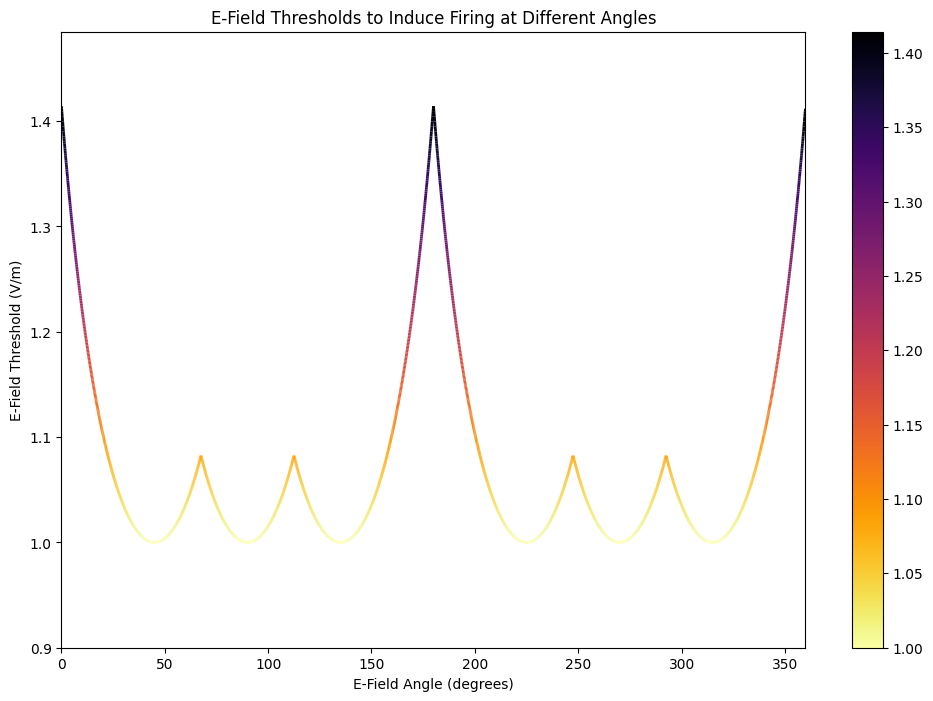

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

min_threshold = 200

def polar_to_cartesian(theta):
    """Convert polar coordinates to Cartesian coordinates."""
    x = np.cos(theta*np.pi/180)
    y = np.sin(theta*np.pi/180)
    return np.array([x, y]).T

def max_dot_product(ref_angles, test_angles):
    ref_vectors = polar_to_cartesian(np.array(ref_angles))
    test_vectors = polar_to_cartesian(np.array(test_angles))
    scalars = np.dot(ref_vectors, test_vectors.T)
        
    return np.max(scalars, axis=0)

ref_angles = [0, 45, 180, 315]
test_angles = np.arange(0, 360, 0.1)
scalars = max_dot_product(ref_angles, test_angles)
thresholds = 1/scalars*200
thresh_test = [np.min(1/np.abs(np.cos((np.array(ref_angles)-test_angle)*np.pi/180))) for test_angle in test_angles]
thresholds = np.array(thresh_test)
print(thresholds)

points = np.array([test_angles, thresholds]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(figsize=(12, 8))

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(thresholds.min(), thresholds.max())
lc = LineCollection(segments, cmap='inferno_r', norm=norm)
# Set the values used for colormapping
lc.set_array(thresholds)
lc.set_linewidth(2)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

ax.set_xlim(test_angles.min(), test_angles.max())
ax.set_ylim(thresholds.min()*0.9, thresholds.max()*1.05)
ax.set_xlabel('E-Field Angle (degrees)')
ax.set_ylabel('E-Field Threshold (V/m)')
ax.set_title('E-Field Thresholds to Induce Firing at Different Angles')
plt.show()
